In [31]:
import numpy as np
from matplotlib import pyplot as plt

In [10]:
from main import MiddleLayer, OutputLayer, relu, relu_dash, softmax, error_dash

In [4]:
from sklearn import datasets

iris_data = datasets.load_iris()
input_data = iris_data.data
correct = iris_data.target
n_data = len(correct)

In [6]:
ave_input = np.average(input_data, axis=0)
std_input = np.std(input_data, axis=0)
input_data = (input_data - ave_input) / std_input

In [8]:
correct_data = np.zeros((n_data, 3))
for i in range(n_data):
    correct_data[i, correct[i]] = 1.0

In [9]:
index = np.arange(n_data)
index_train = index[index % 2 == 0]
index_test = index[index % 2 == 1]

input_train = input_data[index_train]
correct_train = correct_data[index_train]
input_test = input_data[index_test]
correct_test= correct_data[index_test]

In [21]:
n_train = len(input_train)
n_test = len(input_test)

In [12]:
n_in = 4
n_mid1 = 25
n_mid2 = 25
n_out = 3

In [54]:
wb_width = 0.1
eta = 0.01
epoch = 100
batch_size = 8
interval = 10

In [70]:
layers = []

layers.append(MiddleLayer(n_in, n_mid1, activation_func=relu, activation_func_dash=relu_dash, wb_width=wb_width, eta=eta))
layers.append(MiddleLayer(n_mid1, n_mid2, activation_func=relu, activation_func_dash=relu_dash, wb_width=wb_width, eta=eta))
layers.append(OutputLayer(n_mid2, n_out, activation_func=softmax, error_func_dash=error_dash, wb_width=wb_width, eta=eta))

In [71]:
def forward(X):
    Y = X[:]
    for layer in layers:
        Y = layer.forward(Y)
    return Y

def backward(Y):
    X = Y[:]
    for layer in layers[::-1]:
        X = layer.backward(X)
    return X

In [72]:
def get_error(Y, T, batch_size):
    return -np.sum(T * np.log(Y + 1e-7)) / batch_size

In [73]:
train_error_x = []
train_error_y = []
test_error_x = []
test_error_y = []

In [74]:
n_batch = n_train // batch_size

In [75]:
for i in range(epoch):

    Y = forward(input_train)
    error_train = get_error(Y, correct_train, n_train)

    Y = forward(input_test)
    error_test = get_error(Y, correct_test, n_test)

    train_error_x.append(i)
    train_error_y.append(error_train)
    test_error_x.append(i)
    test_error_y.append(error_test)

    if i % interval == 0:
        print(f"Epoch: {i} / {epoch}", f"Error_train: {error_train}", f"Error_test: {error_test}")
    
    index_random = np.arange(n_train)
    np.random.shuffle(index_random)
    for j in range(n_batch):
        mb_index = index_random[j * batch_size : (j + 1) * batch_size]
        X = input_train[mb_index]
        Y = correct_train[mb_index]

        forward(X)
        backward(Y)

Epoch: 0 / 100 Error_train: 1.1036984441771092 Error_test: 1.1026002691367927
Epoch: 10 / 100 Error_train: 0.44404989536434264 Error_test: 0.44872998521100016
Epoch: 20 / 100 Error_train: 0.2160369507907878 Error_test: 0.21289043630480692
Epoch: 30 / 100 Error_train: 0.1006975333467551 Error_test: 0.1179266838584869
Epoch: 40 / 100 Error_train: 0.06292635900228978 Error_test: 0.09057755496747331
Epoch: 50 / 100 Error_train: 0.04748210588902449 Error_test: 0.08595940157019966
Epoch: 60 / 100 Error_train: 0.037577454956059464 Error_test: 0.0724529734549392
Epoch: 70 / 100 Error_train: 0.03225060141678571 Error_test: 0.06836339880055492
Epoch: 80 / 100 Error_train: 0.029625884585022463 Error_test: 0.08305755556671046
Epoch: 90 / 100 Error_train: 0.025460354886654563 Error_test: 0.06938814561515506


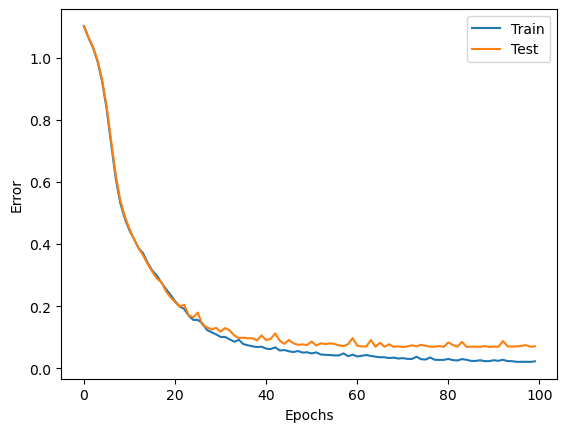

In [76]:
plt.plot(train_error_x, train_error_y, label="Train")
plt.plot(test_error_x, test_error_y, label="Test")
plt.legend()

plt.xlabel("Epochs")
plt.ylabel("Error")

plt.show()

In [78]:
Y = forward(input_train)
count_train = np.sum(np.argmax(Y, axis=1) == np.argmax(correct_train, axis=1))

Y = forward(input_test)
count_test = np.sum(np.argmax(Y, axis=1) == np.argmax(correct_test, axis=1))

print(f"Accuracy Train: {count_train / n_train * 100}%", f"Accuracy Test: {count_test / n_test * 100}%")

Accuracy Train: 100.0% Accuracy Test: 97.33333333333334%
